In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import random
import time
import operator
from collections import Counter
import csv
data = pd.read_csv("WC.csv")
data

,Player,Position,Probability,Detailed position,Number,Birth date,Age,Caps,Weight (KG),Height (cm),Birth place,National team,Continent / Region,Team,Country of current team,Continent of current team / Region,Won the World Cup?,How many times played the World Cup? (including this one),Has ever won Champions League?,Previous teams?
0,Alisson,Goalkeeper,0.001666,NaN,1.0,2/10/1992,30.0,56.0,NaN,191.0,Brazil,Brazil,South America,Liverpool,England,Europe,0.0,NaN,NaN,Internacional (BRA)
1,Ederson,Goalkeeper,0.005413,NaN,NaN,17/08/1993,29.0,18.0,NaN,188.0,Brazil,Brazil,South America,Manchester City,England,Europe,0.0,NaN,NaN,NaN
2,Weverton,Goalkeeper,0.001815,NaN,NaN,13/12/1987,34.0,11.0,89.0,189.0,Brazil,Brazil,South America,Palmeiras,Brazil,South America,0.0,NaN,NaN,NaN
3,Alex Sandro,Defender,0.005548,Right/Left Back,NaN,26/01/1991,31.0,37.0,NaN,NaN,Brazil,Brazil,South America,Juventus,Italy,Europe,0.0,NaN,NaN,NaN
4,Alex Telles,Defender,0.001465,Right/Left Back,NaN,15/12/1992,29.0,7.0,NaN,NaN,Brazil,Brazil,South America,Sevilla,Spain,Europe,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,Bryan Mbeumo,Forward,0.005279,NaN,NaN,07/08/1999,23.0,1.0,NaN,NaN,Cameroon,Cameroon,Africa,Brentford,England,Europe,NaN,NaN,NaN,NaN
314,Eric Maxim Choupo-Moting,Forward,0.003907,NaN,NaN,23/03/1989,33.0,68.0,NaN,NaN,Germany,Cameroon,Africa,Bayern Munich,Germany,Europe,NaN,NaN,NaN,NaN
315,Christian Bassogog,Forward,0.004263,NaN,NaN,18/10/1995,27.0,42.0,NaN,NaN,Cameroon,Cameroon,Africa,SH Shenhua,China,Asia,NaN,NaN,NaN,NaN
316,Marou Souaibou,Forward,0.003139,NaN,NaN,03/12/1995,21.0,0.0,NaN,NaN,Cameroon,Cameroon,Africa,Coton Sport FC,Cameroon,Africa,NaN,NaN,NaN,NaN


In [13]:
data[data['Player'].str.contains(',', regex=False)]

,Player,Position,Probability,Detailed position,Number,Birth date,Age,Caps,Weight (KG),Height (cm),Birth place,National team,Continent / Region,Team,Country of current team,Continent of current team / Region,Won the World Cup?,How many times played the World Cup? (including this one),Has ever won Champions League?,Previous teams?
20,"Neymar Jr.,Forward,0.005264696306,,10,05/02/19...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,"Tite,Coach,0.002783684881,,,,122,,,,Brazil,Bra...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
def split_row(row):
    values = row['Player'].split(',')
    row['Player'] = values[0]
    row['Position'] = values[1]
    row['Probability'] = float(values[2])
    row['Detailed position'] = values[3]
    row['Number'] = values[4]
    row['Birth date'] = values[5]
    row['Age'] = values[6]
    row['Caps'] = values[7]
    row['Weight (KG)'] = values[8]
    row['Height (cm)'] = values[9]
    row['Birth place'] = values[10]
    row['National team'] = values[11]
    row['Continent / Region'] = values[12]
    row['Team'] = values[13]
    row['Country of current team'] = values[14]
    row['Continent of current team / Region'] = values[15]
    row['Won the World Cup?'] = values[16]
    row['How many times played the World Cup? (including this one)'] = values[17]
    row['Has ever won Champions League?'] = values[18]
    row['Previous teams?'] = values[19]
    
    return row

data[data['Player'].str.contains(',', regex=False)] = data[data['Player'].str.contains(',', regex=False)].apply(lambda row: split_row(row), axis=1)

In [ ]:
data[data['Player'].str.contains(',', regex=False)]

In [16]:
data = data[['Player', 'Probability', 'National team']]
data = data.dropna(axis=0, subset=['Probability'])
data['Probability'] = data['Probability'] / data['Probability'].sum()

Simulation: 10
200720
Iteration 0: 0.0802912000217475 seconds
1810120
Iteration 1: 0.3703871999750845 seconds
87880
Iteration 2: 0.03264849999686703 seconds
380640
Iteration 3: 0.07397500000661239 seconds
359320
Iteration 4: 0.06906419998267666 seconds
620360
Iteration 5: 0.1379064000211656 seconds
596960
Iteration 6: 0.24061399995116517 seconds
1753440
Iteration 7: 0.5192531999782659 seconds
646360
Iteration 8: 0.1381931999931112 seconds
492960
Iteration 9: 0.10834400000749156 seconds
[200720, 1810120, 87880, 380640, 359320, 620360, 596960, 1753440, 646360, 492960]


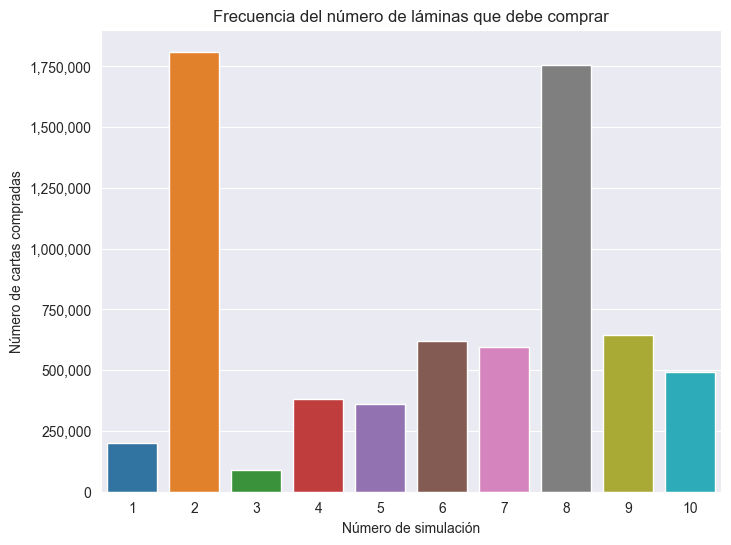

[200402, 1809802, 87562, 380322, 359002, 620042, 596642, 1753122, 646042, 492642]


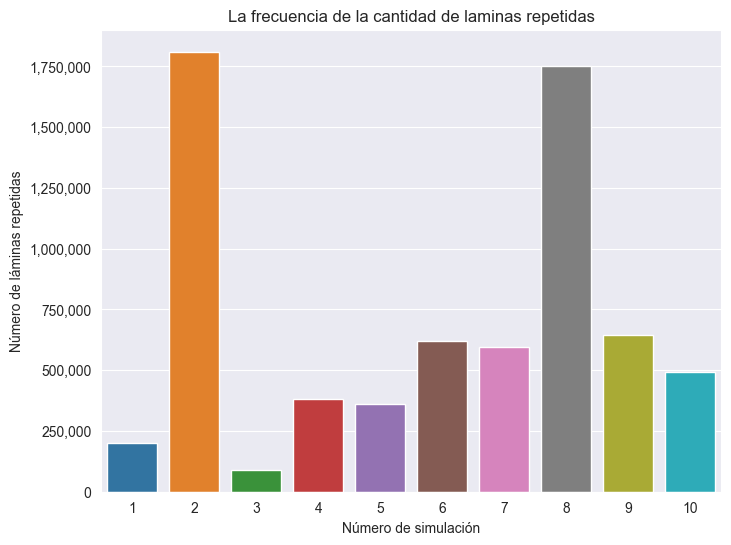

[17, 9, 12, 28, 15, 35, 25, 34, 26, 6]


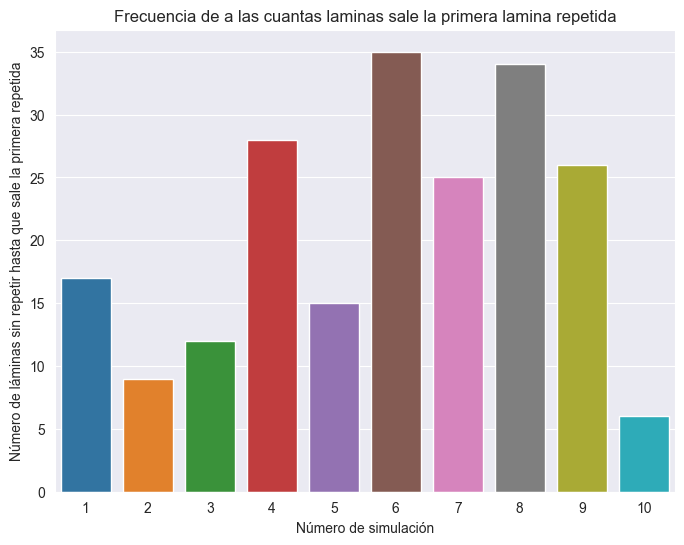

Simulation: 100
2525640
Iteration 0: 0.6525667000096291 seconds
924040
Iteration 1: 0.2349959999555722 seconds
305760
Iteration 2: 0.08403279999038205 seconds
862680
Iteration 3: 0.1859068000339903 seconds
241800
Iteration 4: 0.05118090001633391 seconds
287560
Iteration 5: 0.052501300000585616 seconds
240240
Iteration 6: 0.04891270003281534 seconds
4034680
Iteration 7: 0.9679599000373855 seconds
125840
Iteration 8: 0.0673664000350982 seconds
1111760
Iteration 9: 0.32494610000867397 seconds
262080
Iteration 10: 0.11628439999185503 seconds
493480
Iteration 11: 0.12140740000177175 seconds
671320
Iteration 12: 0.1656753999995999 seconds
161200
Iteration 13: 0.07405260001542047 seconds
67600
Iteration 14: 0.03286520001711324 seconds
365040
Iteration 15: 0.13322409999091178 seconds
776880
Iteration 16: 0.1598283999483101 seconds
585520
Iteration 17: 0.11854840000160038 seconds
3954600
Iteration 18: 0.9797593000112101 seconds
85280
Iteration 19: 0.03607749997172505 seconds
790400
Iteration 20

In [92]:
#Número de láminas que tiene cada sobre 30
#Numero de sobre que puede haber cómo mínimo 10000

def calculate_sheets(sheets, repeat, n_repeat, pack_buy): #Función que calcula el número de sobres que se deben comprar para completar el álbum
    comprob = False
    sheets_set = set(sheets) #Conjunto de láminas
    while len(sheets_set) > 0: #Mientras el conjunto de láminas sea mayor a 0
        pack = np.random.choice(data['Player'], size=520, replace=True, p=data['Probability']) #Se escogen 520 láminas al azar dependiendo de la probabilidad de cada una
        for sheet in pack: #Para cada lámina en el sobre
            if sheet in sheets_set: #Si la lámina está en el conjunto de láminas
                sheets_set.remove(sheet) #Se elimina la lámina del conjunto
                if comprob == False: #Si la lámina no se ha repetido
                    repeat +=1
            else: #Si la lámina no está en el conjunto de láminas
                comprob = True 
                n_repeat +=1 #Se suma 1 a la cantidad de láminas repetidas
        pack_buy += 1 #Se suma 1 a la cantidad de sobres comprados
    return pack_buy, repeat, n_repeat

sim = [10, 100] #Lista del número de simulaciones
#10, 100, 1000, 10000, 100000
total = [] #Lista de la cantidad de láminas compradas para cada simulación
counter = 0 #Contador para el número de simulación

for simulation in sim: #Para cada simulación
    list_packs = []
    r = [] #Lista de láminas hasta que se encuentra la primera repetida
    wo = [] #Lista de láminas repetidas

    print(f"Simulation: {simulation}")

    for i in range(simulation): #Para cada iteración
            repeat=0
            n_repeat=0
            pack_buy = 0
            laminas = list(data['Player']) #Lista de láminas
            start_time = time.perf_counter()  # Inicio del temporizador
            pack_buy, repeat, n_repeat = calculate_sheets(laminas, repeat, n_repeat, pack_buy) #Se llama a la función que calcula el número de sobres que se deben comprar para completar el álbum
            print(pack_buy*520)
            list_packs.append(pack_buy*520) #Se agrega el número de láminas compradas a la lista
            end_time = time.perf_counter()  # Fin del temporizador
            elapsed_time = end_time - start_time  # Tiempo transcurrido
            print(f"Iteration {i}: {elapsed_time} seconds")
            r.append(repeat)
            wo.append(n_repeat)
    total.append(list_packs)

    if simulation == 10:

        # Graficar los resultados La frecuencia del numero de laminas que debe comprar.
        print(total[counter])
        sns.set_style('darkgrid')
        plt.figure(figsize=(8, 6))
        ax = sns.barplot(x=[i for i in range(1, simulation+1)], y=total[0], estimator=sum, errorbar=None)

        # Definir el formato de los valores del eje y en miles
        fmt = mtick.StrMethodFormatter("{x:,.0f}")
        ax.yaxis.set_major_formatter(fmt)

        plt.title('Frecuencia del número de láminas que debe comprar')
        plt.xlabel('Número de simulación')
        plt.ylabel('Número de cartas compradas')
        plt.show()

        counter+=1

        # Graficar los resultados La frecuencia de a las cuantas laminas sale la primera lamina repetida.
        print(wo)
        sns.set_style('darkgrid')
        plt.figure(figsize=(8, 6))
        ax3 = sns.barplot(x=[i for i in range(1, simulation+1)], y=wo, estimator=sum, errorbar=None)

        # Definir el formato de los valores del eje y en miles
        fmt = mtick.StrMethodFormatter("{x:,.0f}")
        ax3.yaxis.set_major_formatter(fmt)

        plt.title('La frecuencia de la cantidad de laminas repetidas')
        plt.xlabel('Número de simulación')
        plt.ylabel('Número de láminas repetidas')
        plt.show() 

        # Graficar los resultados La frecuencia de a las cuantas laminas sale la primera lamina repetida.
        print(r)
        sns.set_style('darkgrid')
        plt.figure(figsize=(8, 6))
        ax2 = sns.barplot(x=[i for i in range(1, simulation+1)], y=r, estimator=sum, errorbar=None)

        plt.title('Frecuencia de a las cuantas laminas sale la primera lamina repetida')
        plt.xlabel('Número de simulación')
        plt.ylabel('Número de láminas sin repetir hasta que sale la primera repetida')
        plt.show() 

    else:
        continue

In [44]:
with open('World_cup.csv') as archivo_csv: #Se abre el archivo csv
    lector_csv = csv.DictReader(archivo_csv)
    nombres = []
    for fila in lector_csv:
        nombres.append(fila['National team']) #Se agrega el nombre de cada jugador a la lista nombres
    
    conteo_nombres = Counter(nombres)
    print(conteo_nombres)

Counter({'Brazil': 27, 'Japan': 27, 'Costa Rica': 27, 'Australia': 27, 'Germany': 27, 'Poland': 27, 'Wales': 27, 'USA': 27, 'Belgium': 27, 'Cameroon': 27, 'France': 26, 'Denmark': 22})


Los nombres de las 10 láminas más repetidas

In [67]:
countries = set()
for country in data['National team']:
    countries.add(country)

countries_dict = {country: [0,0] for country in countries}
print(countries_dict)

num_countries = {country: [0] for country in countries}
print(num_countries)

{'Belgium': [0, 0], 'Costa Rica': [0, 0], 'Wales': [0, 0], 'Cameroon': [0, 0], 'Brazil': [0, 0], 'France': [0, 0], 'Australia': [0, 0], 'Germany': [0, 0], 'Denmark': [0, 0], 'USA': [0, 0], 'Poland': [0, 0], 'Japan': [0, 0]}
{'Belgium': [0], 'Costa Rica': [0], 'Wales': [0], 'Cameroon': [0], 'Brazil': [0], 'France': [0], 'Australia': [0], 'Germany': [0], 'Denmark': [0], 'USA': [0], 'Poland': [0], 'Japan': [0]}


In [68]:
def names_(sheets, players, countries,num_countries, pr_ult): #Función que simula el llenado del álbum
    completed_teams = set()
    validador=False
    while len(sheets) > 0:
        pack = np.random.choice(data['Player'], size=520, replace=True, p=data['Probability'])
        for sheet in pack:
            if sheet in sheets:
                sheets.remove(sheet)
                team = data.loc[data['Player'] == sheet, 'National team'].iloc[0] #Se obtiene el equipo al que pertenece la lámina
                ult_team = data.loc[data['Player'] == sheet, 'National team'].item() #Se obtiene el equipo al que pertenece la lámina
                num_countries[team][0]+=1
                if(validador == False) and (num_countries[team][0] == conteo_nombres[ult_team]): #Se verifica si el equipo se completó
                  pr_ult.append(ult_team)
                  validador = True
                completed_teams.add(team)
            else:
                #Para las láminas repetidas
                countries[team][0] += 1 #Se agrega 1 al contador de láminas del equipo
                players[sheet][0] += 1 #Se agrega 1 al contador de láminas del jugador

            countries[team][1] += 1
            players[sheet][1] += 1
    pr_ult.append(ult_team)
    return players, completed_teams, countries, pr_ult

laminas = list(data['Player'])
d = {name: [0,0] for name in laminas}

d, completed_teams, countries_dict, pr_ult = names_(laminas, d, countries_dict,num_countries, pr_ult=[])

print(d)

{'Alisson': [1584, 1585], 'Ederson': [4978, 4979], 'Weverton': [1588, 1589], 'Alex Sandro': [5161, 5162], 'Alex Telles': [1294, 1295], 'Dani Alves': [5337, 5338], 'Danilo': [4037, 4038], 'Bremer': [3564, 3565], 'Éder Militão': [2765, 2766], 'Marquinhos': [1103, 1104], 'Thiago Silva': [3847, 3848], 'Bruno Guimarães': [2177, 2178], 'Casemiro': [5684, 5685], 'Everton Ribeiro': [5369, 5370], 'Fabinho': [3886, 3887], 'Fred': [4582, 4583], 'Lucas Paquetá': [3159, 3160], 'Antony': [4560, 4561], 'Gabriel Jesus': [4623, 4624], 'Gabriel Martinelli': [1557, 1558], 'Neymar Jr.': [4871, 4872], 'Pedro': [1104, 1105], 'Raphinha': [1464, 1465], 'Richarlison': [1503, 1504], 'Rodrygo': [3822, 3823], 'Vinicius Jr.': [2506, 2507], 'Tite': [2544, 2545], 'Kasper Schmeichel': [3296, 3297], 'Oliver Christensen': [5072, 5073], 'Andreas Christensen': [2772, 2773], 'Simon Kjaer': [3230, 3231], 'Jens Larsen': [3918, 3919], 'Joachim Andersen': [5576, 5577], 'Victor Nelsson': [3284, 3285], 'Rasmus Kristensen': [446

  Nombres de las más repetidas  Cantidad de veces repetidas
0                Jordan Morris                         5835
1         Simon Ngapandouetnbu                         5743
2           Robert Lewandowski                         5731
3              Nicolas Nkoulou                         5720
4                Youstin Salas                         5709
5               Kendall Waston                         5704
6             Krzysztof Piatek                         5685
7                     Casemiro                         5684
8  Andre-Franck Zambo-Anguissa                         5683
9                  Kai Havertz                         5670


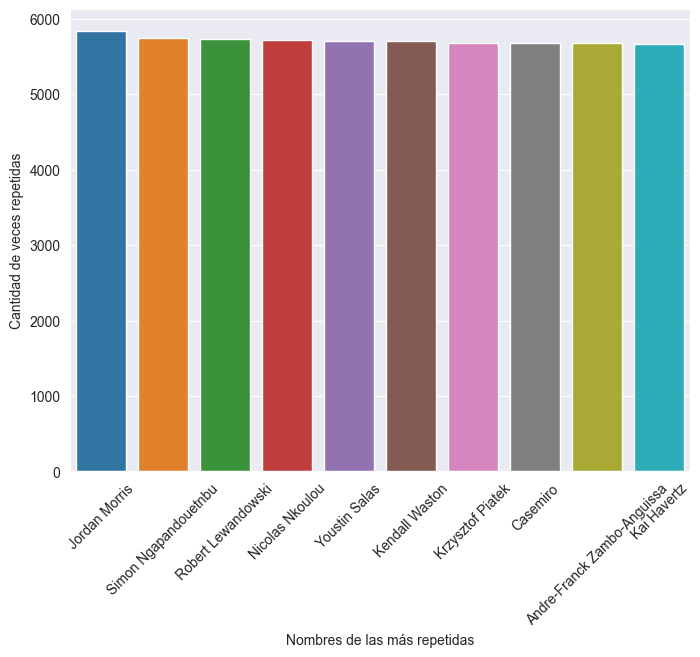

In [72]:

# Ordenar el diccionario de mayor a menor
d_sorted = dict(sorted(d.items(), key=lambda x: x[1][0], reverse=True))

# Tomar los 10 mayores
top_10 = dict(list(d_sorted.items())[:10])

# Crear un nuevo diccionario con las claves y la primera columna de los valores ordenados
new_d = {k: v[0] for k, v in top_10.items()}

# Convertir el diccionario en un DataFrame
df = pd.DataFrame.from_dict(new_d, orient='index', columns=['Cantidad de veces repetidas'])

# Agregar una columna con las claves
df.reset_index(inplace=True)
df.rename(columns={'index': 'Nombres de las más repetidas'}, inplace=True)

# Imprimir el DataFrame resultante
print(df)

# Graficar los resultados
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Nombres de las más repetidas', y='Cantidad de veces repetidas', data=df)

# Inclinamos los nombres en 45 grados
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()


Los nombres de las 10 láminas menos repetidas

  Nombres de las menos repetidas  Cantidad de veces repetidas
0                  Ethan Horvath                            0
1                  Romelu Lukaku                           22
2                  Karim Benzema                           46
3                 Connor Roberts                           53
4              Youssoufa Moukoko                           95
5                Arkadiusz Milik                          125
6           Charles de Ketelaere                          160
7                Benjamin Pavard                          184
8                Cristian Roldan                          185
9                 Kingsley Coman                          190


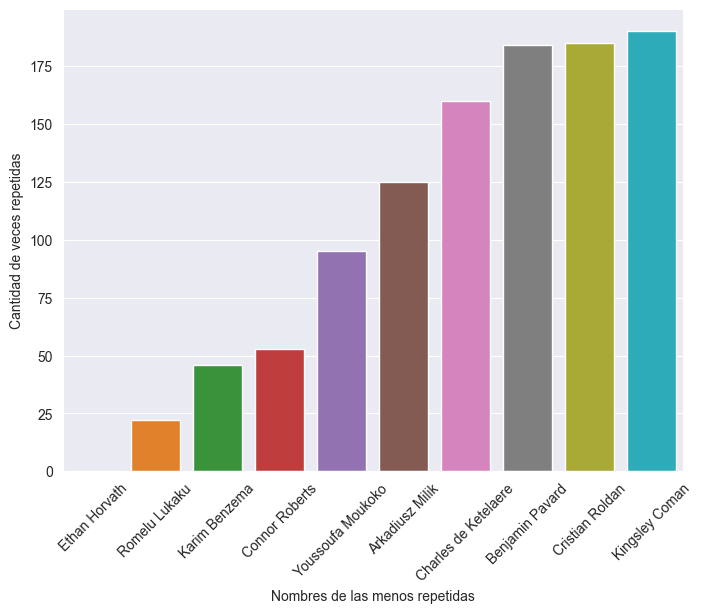

In [86]:
# Ordenar el diccionario de menor a mayor
d_sorted = dict(sorted(d.items(), key=lambda x: x[1][0], reverse=False))

# Tomar los 10 menores
top_10 = dict(list(d_sorted.items())[:10])

# Crear un nuevo diccionario con las claves y la primera columna de los valores ordenados
new_d = {k: v[0] for k, v in top_10.items()}

# Convertir el diccionario en un DataFrame
df2 = pd.DataFrame.from_dict(new_d, orient='index', columns=['Cantidad de veces repetidas'])

# Agregar una columna con las claves
df2.reset_index(inplace=True)
df2.rename(columns={'index': 'Nombres de las menos repetidas'}, inplace=True)

# Imprimir el DataFrame resultante
print(df2)

# Graficar los resultados
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Nombres de las menos repetidas', y='Cantidad de veces repetidas', data=df2, errorbar=None)
# Inclinamos los nombres en 45 grados
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Configuramos el límite inferior del eje y en 0
ax.set_ylim(bottom=0)

# Eliminamos la barra que corresponde a los valores de cero
ax.patches[0].set_height(0)


plt.show()


Cuantas laminas repetidas hubo en total.

In [49]:
total = 0
for clave in d:
    total += d[clave][0]

print("En total hubieron "+str(total)+" láminas repetidas")

En total hubieron 567842 láminas repetidas


Cuantas laminas aparecieron solo una vez

In [50]:
c = 0
for clave in d:
    if d[clave][1] == 1:
        c += 1
print(c)

1


Listado de selecciones de las que se obtuvieron todas las laminas

In [51]:
df3 = pd.DataFrame(completed_teams, columns=['Equipos completados'])
df3

,Equipos completados
0,Belgium
1,Wales
2,Cameroon
3,Costa Rica
4,Brazil
5,France
6,Australia
7,Germany
8,Denmark
9,USA


Los nombres de las 5 selecciones de las que se obtuvieron menos laminas

  Selecciones con menos láminas  Cantidad
0                       Denmark        53
1                        Brazil        67
2                      Cameroon        97
3                     Australia       215
4                         Japan       257


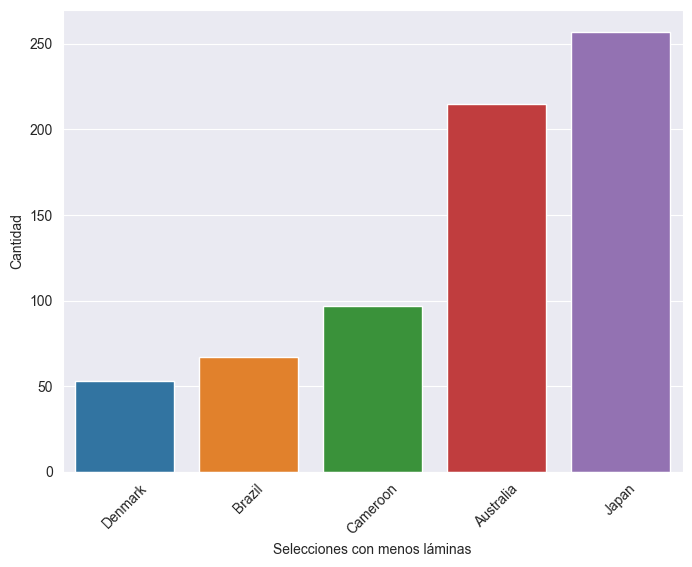

In [63]:
# Ordenar el diccionario de menor a mayor
d_sorted = dict(sorted(countries_dict.items(), key=lambda x: x[1][0], reverse=False))

# Tomar los 5 menores
top_5 = dict(list(d_sorted.items())[:5])

# Crear un nuevo diccionario con las claves y la primera columna de los valores ordenados
new_d = {k: v[0] for k, v in top_5.items()}

# Convertir el diccionario en un DataFrame
df3 = pd.DataFrame.from_dict(new_d, orient='index', columns=['Cantidad'])

# Agregar una columna con las claves
df3.reset_index(inplace=True)
df3.rename(columns={'index': 'Selecciones con menos láminas'}, inplace=True)

# Imprimir el DataFrame resultante
print(df3)

# Graficar los resultados
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Selecciones con menos láminas', y='Cantidad', data=df3)
# Inclinamos los nombres en 45 grados
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

Las 5 selecciones de las que hubo mas laminas repetidas.

  Selecciones con más láminas  Cantidad
0                     Belgium    496077
1                     Germany     57633
2                       Wales      8241
3                      Poland      2903
4                      France      1230


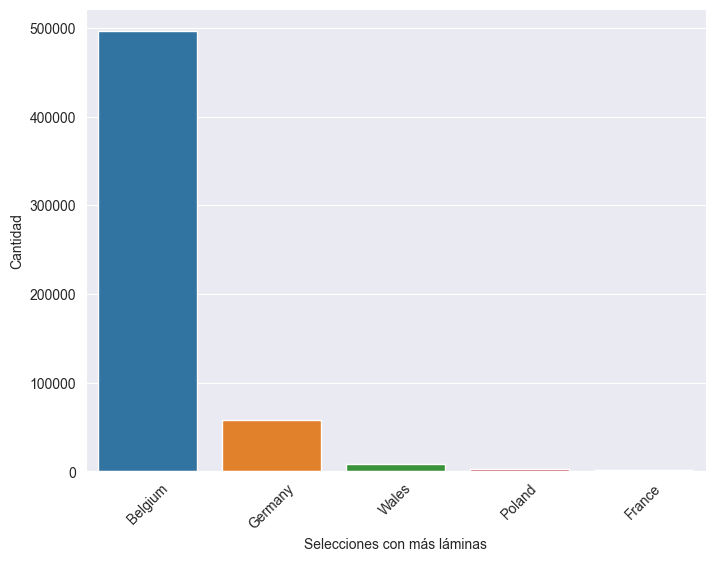

In [65]:
# Ordenar el diccionario de mayor a menor
d_sorted = dict(sorted(countries_dict.items(), key=lambda x: x[1][0], reverse=True))

# Tomar los 5 menores
top_5 = dict(list(d_sorted.items())[:5])

# Crear un nuevo diccionario con las claves y la primera columna de los valores ordenados
new_d = {k: v[0] for k, v in top_5.items()}

# Convertir el diccionario en un DataFrame
df4 = pd.DataFrame.from_dict(new_d, orient='index', columns=['Cantidad'])

# Agregar una columna con las claves
df4.reset_index(inplace=True)
df4.rename(columns={'index': 'Selecciones con más láminas'}, inplace=True)

# Imprimir el DataFrame resultante
print(df4)

# Graficar los resultados
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Selecciones con más láminas', y='Cantidad', data=df4)
# Inclinamos los nombres en 45 grados
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()


Las 5 selecciones de las que hubo menos laminas repetidas

  Selecciones con más láminas  Cantidad
0                     Denmark        53
1                      Brazil        67
2                    Cameroon        97
3                   Australia       215
4                       Japan       257


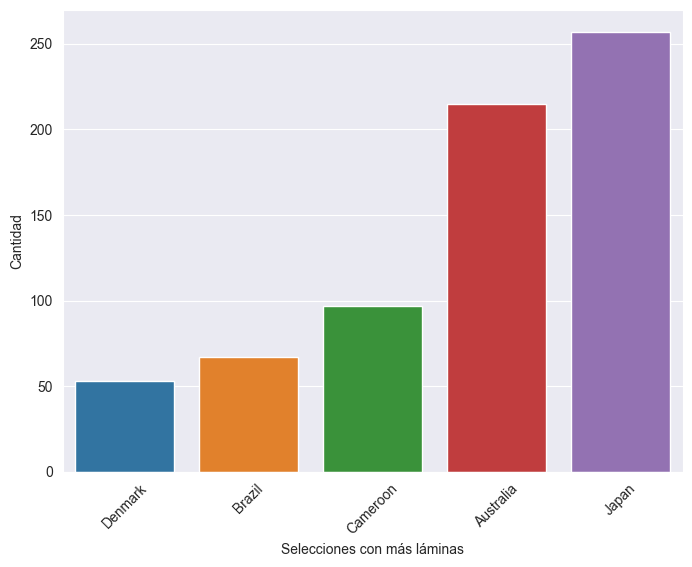

In [66]:
# Ordenar el diccionario de menor a mayor
d_sorted = dict(sorted(countries_dict.items(), key=lambda x: x[1][0], reverse=False))

# Tomar los 5 menores
top_5 = dict(list(d_sorted.items())[:5])

# Crear un nuevo diccionario con las claves y la primera columna de los valores ordenados
new_d = {k: v[0] for k, v in top_5.items()}

# Convertir el diccionario en un DataFrame
df5 = pd.DataFrame.from_dict(new_d, orient='index', columns=['Cantidad'])

# Agregar una columna con las claves
df5.reset_index(inplace=True)
df5.rename(columns={'index': 'Selecciones con más láminas'}, inplace=True)

# Imprimir el DataFrame resultante
print(df5)

# Graficar los resultados
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Selecciones con más láminas', y='Cantidad', data=df5)
# Inclinamos los nombres en 45 grados
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()


Primera y última selección en ser completada

In [57]:
print("La primera selección en ser completada es "+pr_ult[0])
print("La última selección en ser completada es "+pr_ult[1])

La primera selección en ser completada es Denmark
La última selección en ser completada es USA
